In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import DataLoader

import random
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cpu


In [2]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# dataset loader
batch_size = 100
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # L1 Input shape=(?, 1, 28, 28)
        #    Conv     -> (?, 32, 28, 28)
        #    Pool     -> (?, 32, 14, 14)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 Input shape=(?, 32, 14, 14)
        #    Conv      ->(?, 64, 14, 14)
        #    Pool      ->(?, 64, 7, 7)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 Linear 64x7x7 inputs -> 10 outputs
        self.fc = torch.nn.Linear(64*7*7, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.fc(out)
        return out

# parameters
learning_rate = 0.001
training_epochs = 15

# contruct model
model = CNN().to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train
total_batch = len(data_loader)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Learning started. It takes sometime.
[Epoch:    1] cost = 0.225659072
[Epoch:    2] cost = 0.0630080625
[Epoch:    3] cost = 0.0463266
[Epoch:    4] cost = 0.0373877175
[Epoch:    5] cost = 0.0313190743
[Epoch:    6] cost = 0.0262054093
[Epoch:    7] cost = 0.0218811594
[Epoch:    8] cost = 0.0184085406
[Epoch:    9] cost = 0.0164098572
[Epoch:   10] cost = 0.0130243106
[Epoch:   11] cost = 0.0100004096
[Epoch:   12] cost = 0.00999606866
[Epoch:   13] cost = 0.00856383145
[Epoch:   14] cost = 0.00618503802
[Epoch:   15] cost = 0.00771059701
Learning Finished!


Accuracy: 0.9850999712944031
Label:  5
Prediction:  5


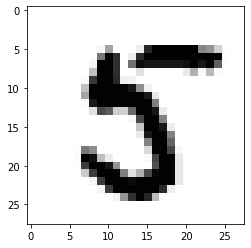

In [3]:
# Test model and check accuracy
with torch.no_grad():
    X_test = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
  
# Random sample test
with torch.no_grad():
  r = random.randint(0, len(mnist_test) - 1)
  img_sample = mnist_test.data[r].view(1, 1, 28, 28).float().to(device)
  label_sample = mnist_test.targets[r].to(device)

  print('Label: ', label_sample.item())
  sample_prediction = model(img_sample)
  print('Prediction: ', torch.argmax(sample_prediction, axis=1).item())

  plt.imshow(mnist_test.data[r].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()
